In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings('ignore')

In [3]:
## Modelling

data = pd.read_excel('/Users/aladelca/Library/CloudStorage/OneDrive-McGillUniversity/MMA/Data mining and visualization/group_assignment/INSY_662_MMA/clean_songs_en_fr_sp.xlsx')
data.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,Polarity,Subjectivity
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.141472,0.735714
1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,-0.067330,0.678125
2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,-0.012500,0.631944
3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.268590,0.535256
4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.177059,0.499412


In [42]:
### Standarization

CLUSTER_VARS = ['liveness','acousticness','energy','instrumentalness','loudness','speechiness','tempo','duration','danceability']

esc = StandardScaler()

data_esc = esc.fit_transform(data[CLUSTER_VARS])




In [43]:
### Clustering

inertias = []
silhouettes = []
for i in np.arange(2,21):
    model = KMeans(n_clusters=i)
    model.fit(data_esc)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(data_esc, model.labels_))
    #data['cluster_kmeans'] = model.labels_

<Axes: >

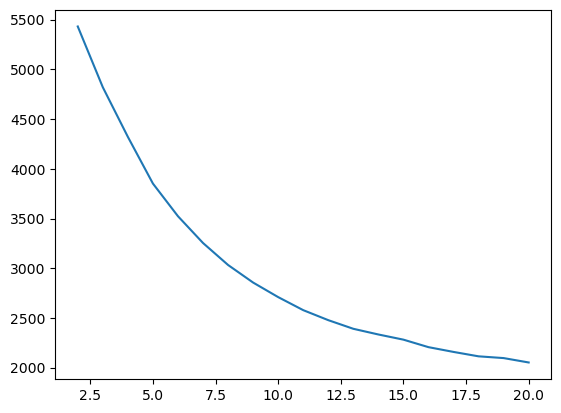

In [44]:
sns.lineplot(x = np.arange(2,21), y = inertias)

<Axes: >

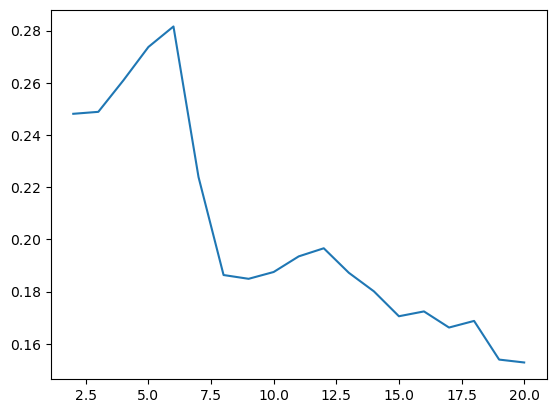

In [45]:
sns.lineplot(x = np.arange(2,21), y = silhouettes)

In [46]:
### Number of clusters 

n = 6

model = KMeans(n_clusters=6)
model.fit(data_esc)
data['kmeans_cluster'] = model.labels_

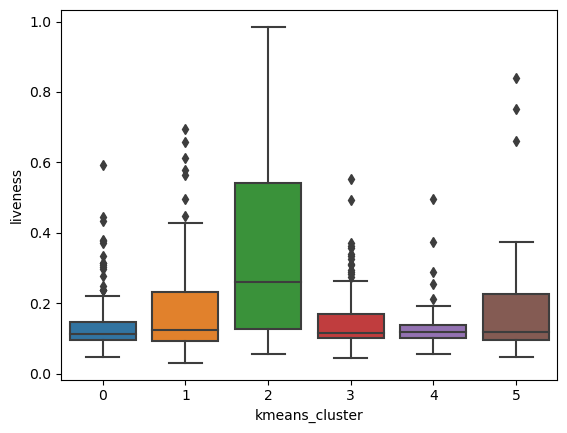

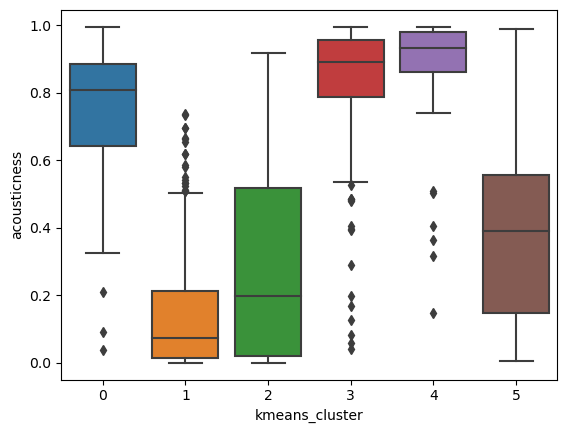

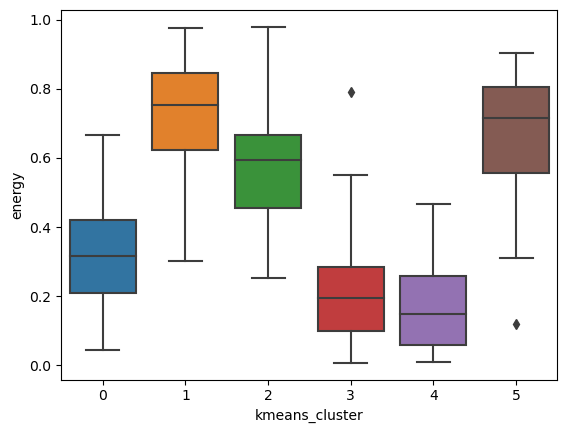

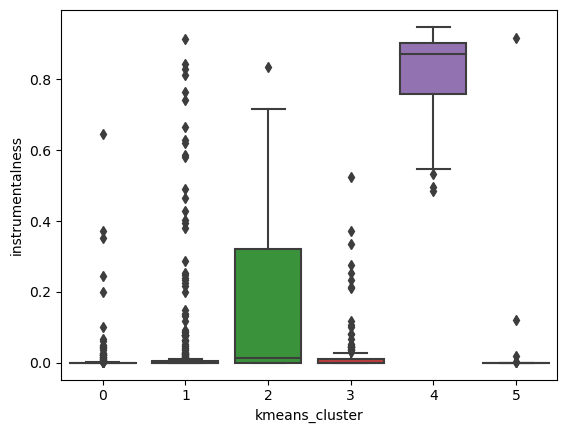

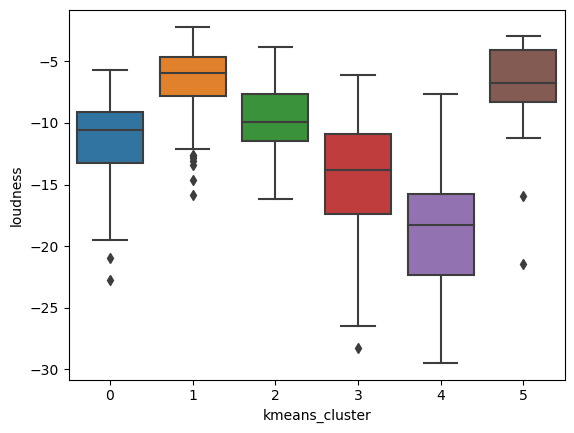

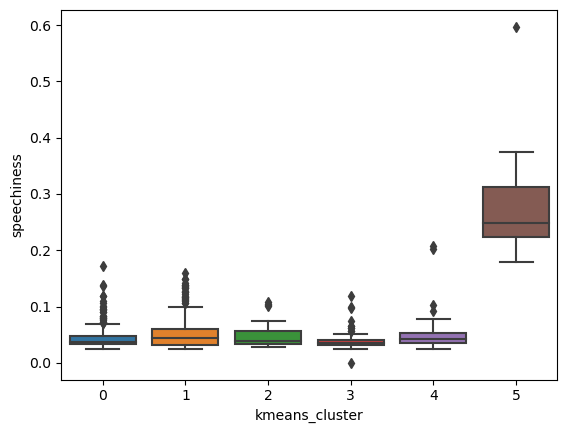

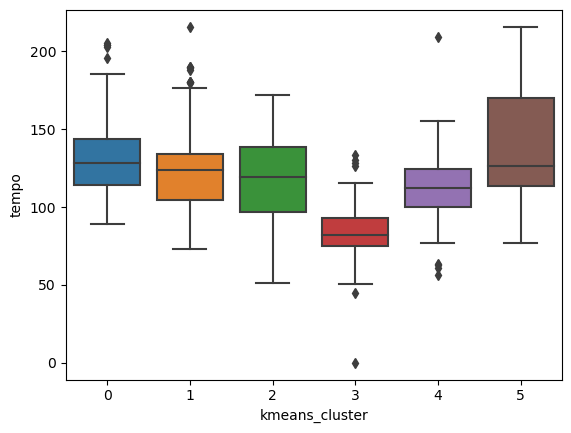

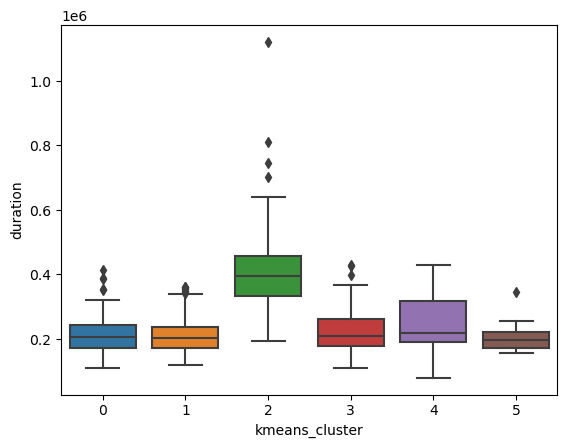

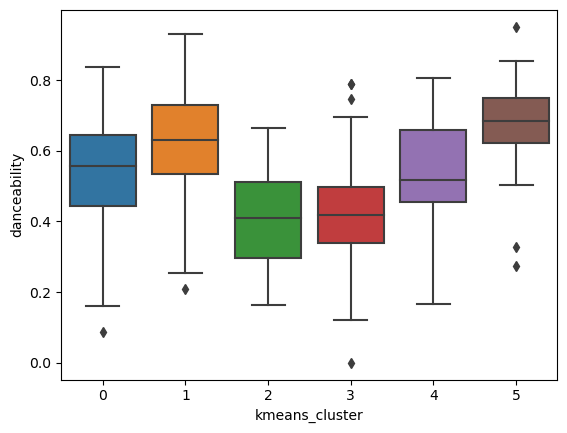

In [47]:
for i in CLUSTER_VARS:
    sns.boxplot(y = data[i], x = data['kmeans_cluster'])
    plt.show()

In [48]:
### Songs

data[data['kmeans_cluster']==5]

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,Polarity,Subjectivity,cluster_kmeans,kmeans_cluster
75,1jDJFeK9x3OZboIAHsY9k2,I'm Still Standing,Elton John,183440,85,0.504,0.35600,0.904,0.121000,0.1400,-6.863,0.179,176.808,0.165000,0.592976,7,5
109,6f3Slt0GbA2bPZlz0aIFXN,The Business,Tiësto,164000,79,0.798,0.41400,0.620,0.019200,0.1120,-7.079,0.232,120.031,-0.058712,0.495833,7,5
123,1xNcBAoUw8Hz6LqK2jt4Ff,Call on Me - Radio Mix,Eric Prydz,171360,77,0.597,0.00427,0.837,0.001150,0.8390,-6.518,0.375,126.342,0.000000,0.300000,5,5
125,4w8niZpiMy6qz1mntFA5uM,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,212500,76,0.842,0.15700,0.801,0.000005,0.0642,-4.167,0.228,95.881,-0.268333,0.683333,7,5
130,6osaMSJh9NguagEDQcZaKx,Loco Contigo (feat. J. Balvin & Tyga),DJ Snake,185194,75,0.694,0.27800,0.758,0.000001,0.1020,-2.986,0.218,192.091,-0.377778,0.466667,7,5
143,0Ftrkz2waaHcjKb4qYvLmz,Delilah (pull me out of this),Fred again..,250702,71,0.685,0.13800,0.827,0.002070,0.3740,-7.745,0.224,133.930,0.208611,0.708056,7,5
215,5c9VRWQx5E5sts3teTBweL,Jazz Cafe,Instrumental Jazz Music Ambient,195555,8,0.567,0.98900,0.120,0.916000,0.1080,-21.429,0.358,215.465,0.304754,0.689692,7,5
311,4jekudehBwLkmmf5TP8zjd,"A-Tisket, A-Tasket",Ella Fitzgerald,158786,0,0.642,0.85900,0.388,0.000000,0.2480,-10.000,0.241,165.074,0.007425,0.308647,7,5
373,30lxDCj66HzjqA4J4cFGez,"Hallelujah, I Love Him So",Ella Fitzgerald,155586,0,0.327,0.76500,0.884,0.000001,0.0928,-6.040,0.207,76.822,0.294944,0.515816,7,5
380,07wpUwUPfMWMlLYQuwHj2M,Honeysuckle Rose,Ella Fitzgerald,162053,0,0.711,0.78000,0.378,0.000000,0.1560,-11.213,0.218,94.573,0.471429,0.764286,7,5
